In [1]:
#Set up dependencies 

from config import (weather_api_key, g_key)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt
from citipy import citipy
import json

#Set up the range of latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Set the empty lists for cities, latitude, longitude 

cities = []
lat_lng = []

#Create the list by creating a set of random lat and lng combinations
lat = np.random.uniform(low=-90.00, high=90.00, size=1500)
lng = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lng = zip(lat, lng)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Add new city names, and skip if already in the list 
    if city not in cities:
        cities.append(city)

#Print the city count
#The number will always be different due the list being randomly generated everytime
len(cities)

606

In [3]:
#Make your API call

url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=2878a798cfb691dad6060a6e56d91fe3'

In [4]:
#Collect the data on each city in the dataset
#Set up the empty lists to hold values 
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0 

#Create a for loop to go through data and fill the lists

for city in cities:
    response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = response.json()
    try:
        city_name.append(weather_json["city"]["name"])
        lat.append(weather_json["city"]["coord"]["lat"])
        lng.append(weather_json["city"]["coord"]["lon"])
        max_temp.append(weather_json["list"][0]["main"]["temp_max"])
        humidity.append(weather_json["list"][0]["main"]["humidity"])
        cloudiness.append(weather_json["list"][0]["clouds"]["all"])
        wind_speed.append(weather_json["list"][0]["wind"]["speed"])
        country.append(weather_json["city"]["country"])
        date.append(weather_json["list"][0]["dt"])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("No Record Found") 
        pass
        
print("---------------")
print("Data Retrieval Complete")
print("---------------")

Processing record 1 of Set 1 | castro
Processing record 2 of Set 1 | ondjiva
Processing record 3 of Set 1 | bosaso
Processing record 4 of Set 1 | hermanus
Processing record 5 of Set 1 | olinda
Processing record 6 of Set 1 | northam
Processing record 7 of Set 1 | zilair
Processing record 8 of Set 1 | punta arenas
Processing record 9 of Set 1 | moerai
Processing record 10 of Set 1 | ushuaia
Processing record 11 of Set 1 | marzuq
No Record Found
Processing record 12 of Set 1 | iqaluit
Processing record 13 of Set 1 | camopi
Processing record 14 of Set 1 | kapaa
Processing record 15 of Set 1 | bluff
No Record Found
Processing record 16 of Set 1 | mataura
Processing record 17 of Set 1 | clovis
Processing record 18 of Set 1 | ampanihy
No Record Found
Processing record 19 of Set 1 | arraial do cabo
Processing record 20 of Set 1 | khatanga
Processing record 21 of Set 1 | victoria
Processing record 22 of Set 1 | fuente de oro
Processing record 23 of Set 1 | jizan
Processing record 24 of Set 1 | 

Processing record 190 of Set 1 | lakes entrance
Processing record 191 of Set 1 | paraiso
Processing record 192 of Set 1 | uruzgan
Processing record 193 of Set 1 | uruacu
Processing record 194 of Set 1 | champerico
Processing record 195 of Set 1 | pandrup
Processing record 196 of Set 1 | mus
Processing record 197 of Set 1 | payakumbuh
Processing record 198 of Set 1 | sayhat
Processing record 199 of Set 1 | santa rosa
Processing record 200 of Set 1 | sao gabriel da cachoeira
Processing record 201 of Set 1 | camacupa
Processing record 202 of Set 1 | kargasok
No Record Found
No Record Found
Processing record 203 of Set 1 | at-bashi
Processing record 204 of Set 1 | launceston
Processing record 205 of Set 1 | camalu
Processing record 206 of Set 1 | anicuns
Processing record 207 of Set 1 | skjervoy
Processing record 208 of Set 1 | cockburn town
Processing record 209 of Set 1 | bandarbeyla
Processing record 210 of Set 1 | mildura
Processing record 211 of Set 1 | chapais
Processing record 212 o

Processing record 382 of Set 1 | piacabucu
Processing record 383 of Set 1 | evensk
Processing record 384 of Set 1 | tromso
Processing record 385 of Set 1 | port augusta
Processing record 386 of Set 1 | yulara
Processing record 387 of Set 1 | stratonion
No Record Found
No Record Found
Processing record 388 of Set 1 | teya
Processing record 389 of Set 1 | huntington
Processing record 390 of Set 1 | henties bay
Processing record 391 of Set 1 | salitral
Processing record 392 of Set 1 | sao filipe
Processing record 393 of Set 1 | olafsvik
Processing record 394 of Set 1 | maua
Processing record 395 of Set 1 | juarez
Processing record 396 of Set 1 | mukhen
Processing record 397 of Set 1 | saint-francois
Processing record 398 of Set 1 | faya
Processing record 399 of Set 1 | teguldet
No Record Found
Processing record 400 of Set 1 | jiangkou
Processing record 401 of Set 1 | high level
Processing record 402 of Set 1 | ayia galini
Processing record 403 of Set 1 | agadir
Processing record 404 of Se

In [5]:
weather_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp,
                           "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, 
                           "Country": country, "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,84.99,31,0,8.50,BR,1600020000
1,Ondjiva,-17.0667,15.7333,83.48,14,3,6.38,AO,1600020000
2,Bosaso,11.2842,49.1816,90.07,60,3,3.40,SO,1600020000
3,Hermanus,-34.4187,19.2345,56.23,73,64,29.24,ZA,1600020000
4,Olinda,-8.0089,-34.8553,82.04,60,37,14.52,BR,1600020000


In [6]:
#Find the amount of cities again
city_count2 = len(weather_df)
print(f"There are now {city_count2} cities in the dataframe.")

There are now 560 cities in the dataframe.


In [7]:
#Send data to output data folder
weather_df.to_csv(r'output_data\my_weather_df.csv')

In [8]:
#Find all the statistical values for the dataframe 
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.024292,16.153667,68.349625,68.335714,49.789286,8.188839,1.600020e+09
std,33.530416,89.849273,15.884218,19.842262,36.764034,5.338762,0.000000e+00
min,-54.800000,-175.200000,24.100000,9.000000,0.000000,0.160000,1.600020e+09
25%,-8.669125,-65.879900,54.182500,60.000000,11.000000,4.030000,1.600020e+09
50%,21.355000,22.624950,72.210000,73.000000,51.500000,7.090000,1.600020e+09
75%,46.839725,91.699400,80.200000,83.000000,87.000000,11.390000,1.600020e+09
max,78.218600,178.416700,106.630000,100.000000,100.000000,29.240000,1.600020e+09


In [ ]:
#Time to remove outliers with humidty of 100%
#humid_100 = weather_df[weather_df["Humidity"] == 100].index
#weather_df = weather_df.drop(humid_100, inplace=True)

In [10]:
#Find the amount of cities again
#city_count3 = len(weather_df)
#print(f"There are now {city_count3} cities in the dataframe.")

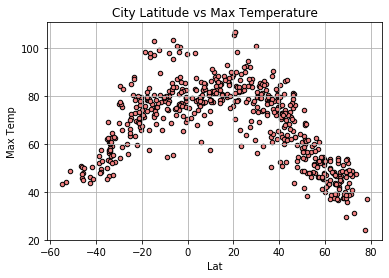

In [11]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Max Temperature 
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", title = "City Latitude vs Max Temperature",
                                color = "lightcoral", edgecolor = "black", grid = True)
                                
#Save the chart to the output folder
plt.savefig("output_data/lat_vs_temp")

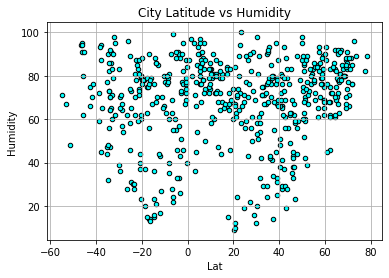

In [12]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Humidity
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Humidity", title = "City Latitude vs Humidity",
                                color = "aqua", edgecolor = "black", grid = True)
                                

plt.savefig("output_data/lat_vs_humidity")

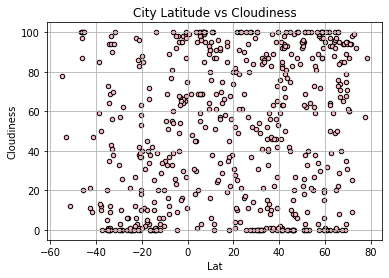

In [13]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Cloudiness 
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", title = "City Latitude vs Cloudiness",
                                color = "lightpink", edgecolor = "black", grid = True)
                                

plt.savefig("output_data/lat_vs_clouds")

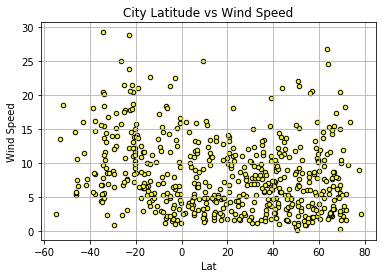

In [14]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Wind Speed
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", title = "City Latitude vs Wind Speed",
                                color = "yellow", edgecolor = "black", grid = True)
                                

plt.savefig("output_data/lat_vs_wind")

In [19]:
#Now time to find the linear regression for the data looking at the Northern and Southern Hemisphere
#Set up Northern and Southern Hemisphere variables 

north_hem = weather_df.loc[weather_df["Lat"] >= 0,:] 
south_hem = weather_df.loc[weather_df["Lat"] < 0,:] 
north_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Bosaso,11.2842,49.1816,90.07,60,3,3.40,SO,1600020000
5,Northam,51.0333,-4.2167,63.25,85,0,4.21,GB,1600020000
6,Zilair,52.2332,57.4392,47.77,77,0,3.38,RU,1600020000
10,Marzuq,14.4000,46.4667,85.08,44,70,2.84,YE,1600020000
11,Iqaluit,63.7506,-68.5145,37.27,83,88,11.39,CA,1600020000


The r-squared is: 0.673088402666865


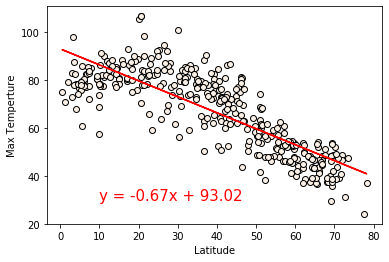

<Figure size 432x288 with 0 Axes>

In [57]:
#Create a linear regression chart comparing Max Temp and Latitude for the Northern Hemisphere
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "linen", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("output_data/north_lat_vs_temp")

The r-squared is: 0.5550144468354739


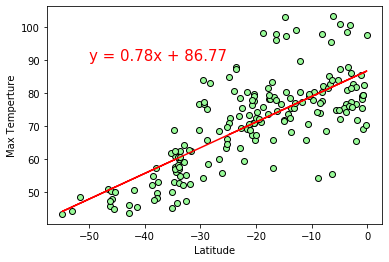

<Figure size 432x288 with 0 Axes>

In [58]:
#Create a linear regression chart comparing Max Temp and Latitude for the Southern Hemisphere
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "palegreen", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("output_data/south_lat_vs_temp")

The r-squared is: 0.0074071195391452556


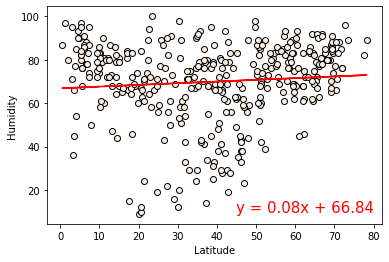

<Figure size 432x288 with 0 Axes>

In [59]:
#Create a linear regression chart comparing Humidity(%) and Latitude for the Northern Hemisphere
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "linen", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("output_data/north_lat_vs_hum")

The r-squared is: 0.016618220648185227


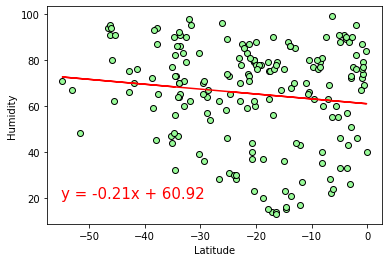

<Figure size 432x288 with 0 Axes>

In [60]:
#Create a linear regression chart comparing Humidity(%) and Latitude for the Southern Hemisphere
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "palegreen", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("output_data/south_lat_vs_hum")

The r-squared is: 0.00014889200504076443


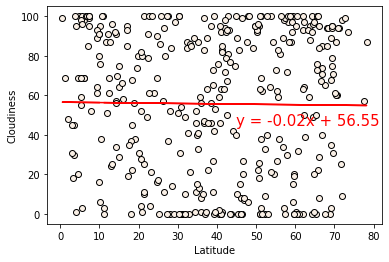

<Figure size 432x288 with 0 Axes>

In [61]:
#Create a linear regression chart comparing Cloudiness(%) and Latitude for the Northern Hemisphere
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "linen", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("output_data/north_lat_vs_cloud")

The r-squared is: 0.01308044433038567


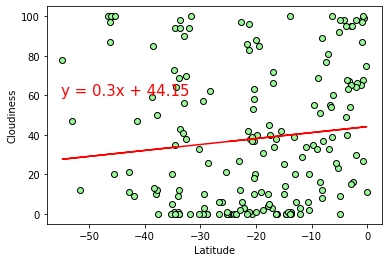

<Figure size 432x288 with 0 Axes>

In [62]:
#Create a linear regression chart comparing Cloudiness(%) and Latitude for the Southern Hemisphere
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "palegreen", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("output_data/south_lat_vs_cloud")

The r-squared is: 0.00035928602964676356


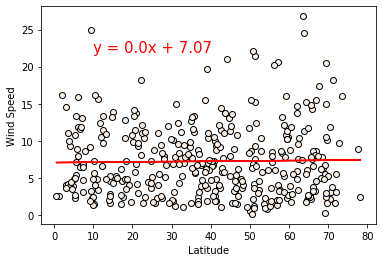

<Figure size 432x288 with 0 Axes>

In [63]:
#Create a linear regression chart comparing Wind Speed(MPH) and Latitude for the Northern Hemisphere
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "linen", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("output_data/north_lat_vs_wind")

The r-squared is: 0.038793975065362016


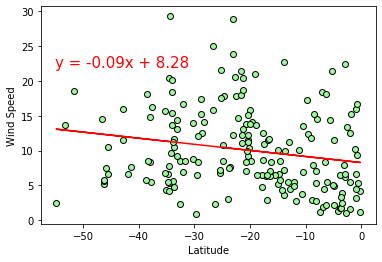

<Figure size 432x288 with 0 Axes>

In [64]:
#Create a linear regression chart comparing Wind Speed(MPH) and Latitude for the Southern Hemisphere
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "palegreen", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("output_data/north_lat_vs_wind")